# Imports

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = 999
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Cargar los csvs como pandas dataframes

In [3]:
robados = pd.read_csv('./curados/robados.csv', parse_dates= ['tramite_fecha', 'fecha_inscripcion_inicial'])
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,1029,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,NaN,SEDAN,08,CHEVROLET,57,CORSA 4 PUERTAS WIND 1.6 MPFI,1.0,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,Argentina,100,6,ARG
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,1047,LANUS Nº 1,Buenos Aires,Nacional,2007.0,NaN,FURGON 600,34,PEUGEOT,EP,PARTNER FURGON D PLC PRESENCE,1.0,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,Argentina,100,6,ARG
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,1059,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,AH,19 RN INYECCION BIC.,1.0,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,Argentina,100,6,ARG
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,1066,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,NaN,BERLINA 3 PUERTAS,37,RENAULT,CC,CLIO RL DIESEL 3 PUERTAS,1.0,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,No identificado,100,6,NaN
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,1074,PILAR Nº 1,Buenos Aires,Nacional,2006.0,NaN,FURGON 600,34,PEUGEOT,DM,PARTNER FURGON 1.4 N PRESENCE,1.0,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,Argentina,100,6,ARG


In [4]:
robados.dtypes

tramite_tipo                                    object
tramite_fecha                           datetime64[ns]
fecha_inscripcion_inicial               datetime64[ns]
registro_seccional_codigo                        int64
registro_seccional_descripcion                  object
registro_seccional_provincia                    object
automotor_origen                                object
automotor_anio_modelo                          float64
automotor_tipo_codigo                          float64
automotor_tipo_descripcion                      object
automotor_marca_codigo                          object
automotor_marca_descripcion                     object
automotor_modelo_codigo                         object
automotor_modelo_descripcion                    object
automotor_uso_codigo                           float64
automotor_uso_descripcion                       object
titular_tipo_persona                            object
titular_domicilio_localidad                     object
titular_do

# Limpieza del dataframe

La idea de esta parte del EDA es sacarnos de encima los NaNs y las columnas que no vamos a usar para nada.

In [5]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                            0.000000
tramite_fecha                           0.000000
fecha_inscripcion_inicial               0.003243
registro_seccional_codigo               0.000000
registro_seccional_descripcion          0.000000
registro_seccional_provincia            0.000000
automotor_origen                        0.000000
automotor_anio_modelo                   0.483233
automotor_tipo_codigo                   4.684764
automotor_tipo_descripcion              0.000000
automotor_marca_codigo                  2.288059
automotor_marca_descripcion             0.000000
automotor_modelo_codigo                 2.497243
automotor_modelo_descripcion            0.000000
automotor_uso_codigo                    0.003243
automotor_uso_descripcion               0.003243
titular_tipo_persona                    0.000000
titular_domicilio_localidad             0.134592
titular_domicilio_provincia             0.000000
titular_genero                          0.000000
titular_anio_nacimie

Las columnas que mas NaNs tienen son los códigos de tipo, marca, modelo y uso y el país de nacimiento del titular. Primero vamos a tirar todas las columnas que codifican y nos vamos a quedar sólo con las descripciones.

In [6]:
cols2drop = ['automotor_tipo_codigo', 'automotor_marca_codigo', 'automotor_modelo_codigo', 
             'automotor_uso_codigo']
robados = robados.drop(cols2drop, axis=1)
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_indec_id,titular_pais_nacimiento_indec_id
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,1029,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,SEDAN,CHEVROLET,CORSA 4 PUERTAS WIND 1.6 MPFI,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,Argentina,100,6,ARG
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,1047,LANUS Nº 1,Buenos Aires,Nacional,2007.0,FURGON 600,PEUGEOT,PARTNER FURGON D PLC PRESENCE,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,Argentina,100,6,ARG
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,1059,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,BERLINA 5 PUERTAS,RENAULT,19 RN INYECCION BIC.,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,Argentina,100,6,ARG
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,1066,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,BERLINA 3 PUERTAS,RENAULT,CLIO RL DIESEL 3 PUERTAS,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,No identificado,100,6,NaN
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,1074,PILAR Nº 1,Buenos Aires,Nacional,2006.0,FURGON 600,PEUGEOT,PARTNER FURGON 1.4 N PRESENCE,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,Argentina,100,6,ARG


Y ahora vamos a dropear el resto de los NaNs.

In [7]:
# Tiramos los NaNs
robados_ncol_old = np.shape(robados)[0]
robados = robados.dropna()
robados_ncol_new = np.shape(robados)[0]

In [8]:
print('Nos quedamos con %2d trámites de los %2d trámites originales' %(robados_ncol_new, robados_ncol_old))
print('Es decir, tiramos el %.2f%% de los casos' %((robados_ncol_old-robados_ncol_new)/robados_ncol_old*100))

Nos quedamos con 58250 trámites de los 61668 trámites originales
Es decir, tiramos el 5.54% de los casos


Chequeamos que no quede ningún NaN

In [9]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                            0.0
tramite_fecha                           0.0
fecha_inscripcion_inicial               0.0
registro_seccional_codigo               0.0
registro_seccional_descripcion          0.0
registro_seccional_provincia            0.0
automotor_origen                        0.0
automotor_anio_modelo                   0.0
automotor_tipo_descripcion              0.0
automotor_marca_descripcion             0.0
automotor_modelo_descripcion            0.0
automotor_uso_descripcion               0.0
titular_tipo_persona                    0.0
titular_domicilio_localidad             0.0
titular_domicilio_provincia             0.0
titular_genero                          0.0
titular_anio_nacimiento                 0.0
titular_pais_nacimiento                 0.0
titular_porcentaje_titularidad          0.0
titular_domicilio_provincia_indec_id    0.0
titular_pais_nacimiento_indec_id        0.0
dtype: float64

Listo, no hay más NaNs en el dataframe.

## EDA

### Robos por año

In [10]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["anio"] = robados["tramite_fecha"].dt.year

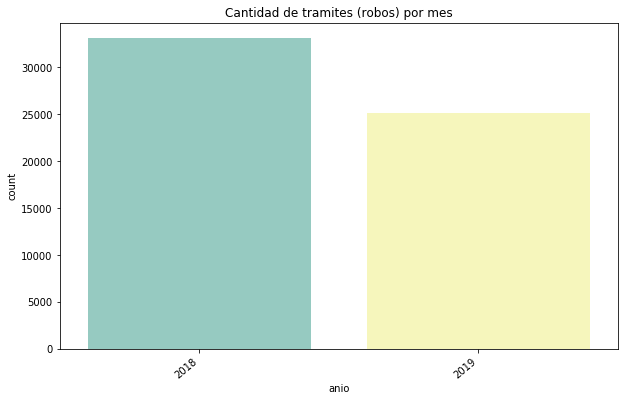

In [11]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="anio", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por mes")
plt.show()

### Robos por mes del año

In [12]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["mes_idx"] = robados["tramite_fecha"].dt.month

In [13]:
# Armo una función que codifique los días de la semana 
def label_month(month_code):
    if (month_code==1):
        return "Enero"
    elif (month_code==2):
        return "Febrero"
    elif (month_code==3):
        return "Marzo"
    elif (month_code==4):
        return "Abril"
    elif (month_code==5):
        return "Mayo"
    elif (month_code==6):
        return "Junio"
    elif (month_code==7):
        return "Julio"
    elif (month_code==8):
        return "Agosto"
    elif (month_code==9):
        return "Septiembre"
    elif (month_code==10):
        return "Octubre"
    elif (month_code==11):
        return "Noviembre"
    elif (month_code==12):
        return "Diciembre"

In [14]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["mes"] = robados["mes_idx"].apply(lambda x: label_month(x))

In [15]:
robados["mes_anio"] = robados["mes"].astype(str).str.cat(robados["anio"].astype(str), sep =" ") 

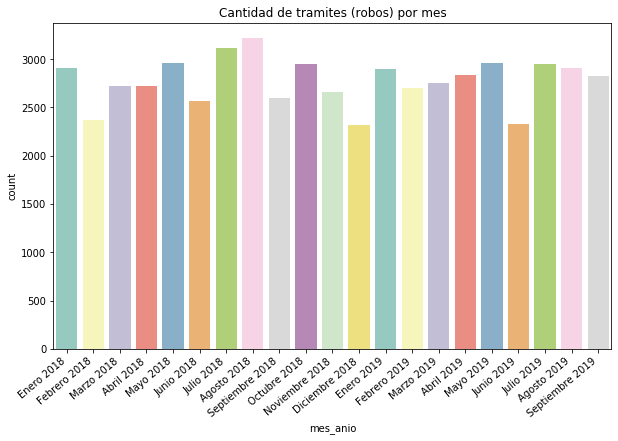

In [16]:
# Ploteamos en un countplot la cantidad de tramites por mes
plt.figure(figsize=(10,6))
ax = sns.countplot(x="mes_anio", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por mes")
plt.show()

Ahora lo que podemos hacer es combinar los meses pero dividir por dos los que aparecen dos veces.

In [17]:
# Armamos un pivot con la cantidad de tramites por mes
mes_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'mes',fill_value=0, aggfunc = 'count')

In [18]:
# OReordenamos los meses
cols = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", 
        "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
mes_pivot = mes_pivot[cols]
# Dividimos por dos los meses que aparecen dos veces
mes_pivot[cols[0:9]] = mes_pivot[cols[0:9]]/2

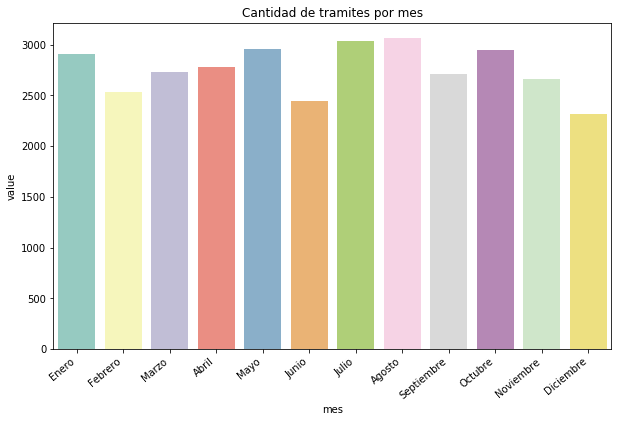

In [19]:
# Convertimos el pivot de mes a formato long para poder plotear con sns
long_mes_pivot = pd.melt(mes_pivot)

# Ploteamos un barplot con la cantidad de tramites por mes
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "value", x = "mes", data = long_mes_pivot,
            palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por mes")
plt.show()

### Robos por día de la semana

In [20]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["dia_semana_idx"] = robados["tramite_fecha"].dt.dayofweek

In [21]:
# Armo una función que codifique los días de la semana 
def label_weekday(day_code):
    if (day_code==0):
        return "Lunes"
    elif (day_code==1):
        return "Martes"
    elif (day_code==2):
        return "Miercoles"
    elif (day_code==3):
        return "Jueves"
    elif (day_code==4):
        return "Viernes"
    elif (day_code==5):
        return "Sabado"
    elif (day_code==6):
        return "Domingo"

In [22]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["dia_semana"] = robados["dia_semana_idx"].apply(lambda x: label_weekday(x))

Ahora creamos una tabla pivote para resumir la cantidad de robos por dia de la semana.

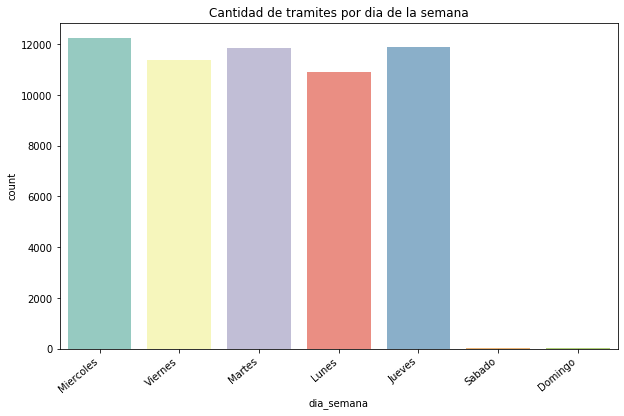

In [23]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="dia_semana", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por dia de la semana")
plt.show()

### Robos por marca

In [24]:
# Arreglo las marcas que están mal codificadas
robados["automotor_marca_descripcion"].unique()

array(['CHEVROLET', 'PEUGEOT', 'RENAULT', 'FORD', 'CITROEN', 'VOLKSWAGEN',
       'MERCEDES BENZ', 'MERCEDES-BENZ', 'HYUNDAI', 'HONDA', 'MITSUBISHI',
       'PINCEN', 'FIAT', 'SUZUKI', 'TOYOTA', 'JEEP', 'ALFA ROMEO',
       'NISSAN', 'AUDI', 'TATA', 'ISUZU', 'IVECO', 'GALLOPER', 'KIA',
       'BMW', 'CHRYSLER', 'DODGE', 'SSANGYONG', 'MINI', 'ROVER', 'CHERY',
       'SEAT', 'DEUTZ-AGRALE', 'EL DETALLE', 'DAIHATSU', 'MAZDA', 'DFM',
       'VOLKSWAGEN (136)', 'VOLSKWAGEN', 'VOLVO', 'RUTERA', 'DACIA',
       'SMART', 'CHRYSLER-DODGE', 'DAEWOO', 'VOLKSWGEN', 'MACTRAIL',
       'M. BENZ', 'SUBARU', 'HELVETICA', 'SUZUKI SWIFT SEDAN NLX', 'GMC',
       'SEAT CORDOBA AZUL', 'FIAT.-', 'LAND ROVER', 'ASIA', 'ARCTIC CAT',
       'TORRESI', 'HERMANN', 'GMC CHEVETTE', 'MERCEDEZ BENZ', 'BONANO',
       'ZUZUKI', 'RENULT', 'RENAUL', 'SALTO', 'LIFAN', 'SATURNI',
       'RENAUTL', 'AST-PRA', 'CHEVROELT', 'RENAULT 21', 'CITROËN', 'RAM',
       'SCANIA', 'RANDON', 'RENEULT', 'RENUALT', 'SIN ESPECIFICACION

In [25]:
# VOLKSWAGEN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN (136)'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '136-VOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'WOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-136-VOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VW SENDA NAFTA'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN/MARCOPOLO'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN (034)'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGAEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOKKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLSKWAGEN'] = 'VOLKSWAGEN'
# RENAULT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT 21'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUTL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENEULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUTL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT (033)'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'REANULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENUALT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-112-RENAULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT 9 RN'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-112- RENAULT'] = 'RENAULT'
# MERCEDES BENZ
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'M. BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDEZ BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDES-BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MECEDES BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'M.BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERSEDES BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDES  BENZ'] = 'MERCEDES BENZ'
# SUZUKI
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT SEDAN NLX'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'ZUZUKI'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT GTI'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT  SEDAN NLX'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI CARRY'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT SEDAN GLX'] = 'SUZUKI'
# GMC
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC  CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC  CHEVROLET'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVROLET'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC   CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVETTE (GENERAL MOTORS CORPORATION)'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GENERAL MOTORS'] = 'GMC'
# JEEP
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'JEEP GLADIATOR 500'] = 'JEEP'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'JEEP ESTANCIERA'] = 'JEEP'
# PEUGEOT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'PEUGEOT (039)'] = 'PEUGEOT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '.PEUGEOT'] = 'PEUGEOT'
# NISSAN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'NISSAN (102)'] = 'NISSAN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-102-NISSAN'] = 'NISSAN'
# CHEVROLET
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEVROELT'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEVROLER'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEROLET'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEWVROLET'] = 'CHEVROLET'
# FIAT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'FIAT.-'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-044-FIAT'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '044 FIAT'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'DUNA SDL 1.3'] = 'FIAT'
# FORD
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'FORD F-100'] = 'FORD'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-047- FORD'] = 'FORD'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '19 - FORD'] = 'FORD'
# SEAT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SEAT CORDOBA AZUL'] = 'SEAT'
# CITROEN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CITROËN'] = 'CITROEN'
# BMW
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'B.M.W.'] = 'BMW'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'B M W'] = 'BMW'
# MITSUBISHI
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MITSIBISHI'] = 'MITSUBISHI'
# CHRYSLER
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHRYSLER-DODGE']  = 'CHRYSLER DODGE'
# DEUTZ-AGRALE
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'DEUTZ - AGRALE']  = 'DEUTZ-AGRALE'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'AGRALE']  = 'DEUTZ-AGRALE'

In [26]:
# Me quedo con las marcas que tiene mas de n tramites
n = 100
vc = robados.groupby('automotor_marca_descripcion').automotor_marca_descripcion.count()>n
vc = vc[vc]
robados_n_marcas = robados.loc[robados.automotor_marca_descripcion.isin(vc.index)]

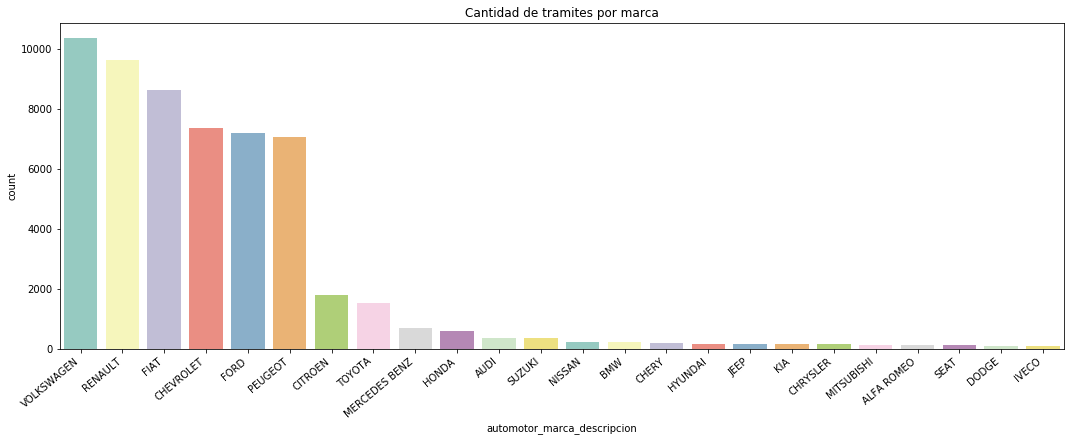

In [27]:
# Robos absolutos por marca

plt.figure(figsize = (18,6))
ax = sns.countplot(x = "automotor_marca_descripcion", 
                   data = robados_n_marcas, 
                   palette = "Set3",
                   order = robados_n_marcas["automotor_marca_descripcion"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por marca")
plt.show()

Uno de las limitaciones al interpretar estos datos es que si en el parque automotor hay mas VW que Seat es lógico esperar que haya mas robos de VW que de otra marca. En caso de que nosotroa quisiéramos tener algo parecido a la probabilidad de que nos roben un auto dada su marca, tendríamos que normalizar estos daos a la cantidad de autos de una determinada marca en el parque automotor de Argentina.

De momento en contamos con una fuente confiable de la cantidad de automobiles por marca en la argentina, pero esta nota periodistica (https://tn.com.ar/autos/lo-ultimo/parque-automotor-las-marcas-y-modelos-con-mas-presencia-en-las-calles-argentinas_873776) nos da una idea, aunque sea grosera, de la composición del parque automotor (fecha: 06/06/2018): "*El parque automotor de la Argentina está compuesto por 13.302.670 de vehículos. Y el 87 por ciento de esta cantidad está representado por apenas siete marcas: Volkswagen (16,5%), Renault (15,5%), Ford (13,5%), Fiat (13,5%), Chevrolet (12%), Peugeot (10%) y Toyota (5,3%)*". A continuación vamos a relativizar los datos previamente hallados al porcentaje del parque automotor por marca.

In [28]:
# Creamos un dataframe con las siete marcas mas vendidas en los index y el marketshare como dato
marcasTN = ['VOLKSWAGEN', 'RENAULT', 'FIAT', 'CHEVROLET', 'FORD', 'PEUGEOT', 'TOYOTA']
ShareTN  = {'share':[.165, .155, .135, .135, .12, .2, .053]}
marketShare_Marcas = pd.DataFrame(ShareTN, index = marcasTN)
marketShare_Marcas

,share
VOLKSWAGEN,0.165
RENAULT,0.155
FIAT,0.135
CHEVROLET,0.135
FORD,0.120
PEUGEOT,0.200
TOYOTA,0.053


In [29]:
# Ahora creo una tabla pivot con solo las siete marcas mas representadas
robadosTN = robados.loc[robados.automotor_marca_descripcion.isin(marcasTN)].groupby('automotor_marca_descripcion').tramite_tipo.agg('count')
robadosTN.head()

automotor_marca_descripcion
CHEVROLET    7370
FIAT         8617
FORD         7180
PEUGEOT      7058
RENAULT      9619
Name: tramite_tipo, dtype: int64

In [30]:
# Junto las dos cosas
robadosNorm = pd.concat([robadosTN, marketShare_Marcas], axis=1)
robadosNorm

,tramite_tipo,share
CHEVROLET,7370,0.135
FIAT,8617,0.135
FORD,7180,0.120
PEUGEOT,7058,0.200
RENAULT,9619,0.155
TOYOTA,1550,0.053
VOLKSWAGEN,10334,0.165


In [31]:
# Normalizo por el MarketShare
N_vehiculos = 13302670
robadosNorm['robosNorm'] = robadosNorm['tramite_tipo'] / (robadosNorm['share']*N_vehiculos)*100
robadosNorm = robadosNorm.sort_values(by=['robosNorm'], ascending = False)
robadosNorm

,tramite_tipo,share,robosNorm
FIAT,8617,0.135,0.479826
VOLKSWAGEN,10334,0.165,0.470810
RENAULT,9619,0.155,0.466508
FORD,7180,0.120,0.449784
CHEVROLET,7370,0.135,0.410388
PEUGEOT,7058,0.200,0.265285
TOYOTA,1550,0.053,0.219845


# Robos por año

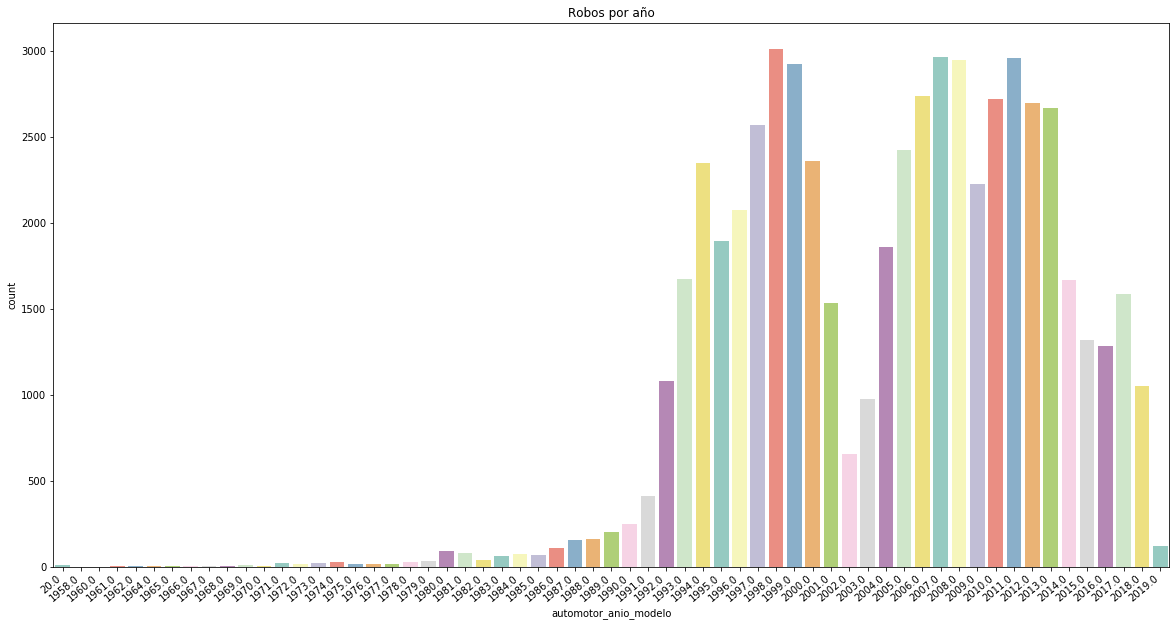

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="automotor_anio_modelo", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Robos por año")
plt.show()

### Robos por modelo

In [33]:
# Arreglo las marcas que están mal codificadas
np.shape(robados["automotor_modelo_descripcion"].unique())

(8684,)

Acá la cosa se complica un poco más y que, como podemos ver, hay 8684 modelos distintos, muchos de esos repetidos con pequeñas variaciones (por ejemplo: XXX). 

En este caso tenemos como dato los 59 modelos con más patentamientos en los años 2018 y 2019 que, si bien no son directamente la composición del parque automotor, nos dan una idea grosera de la frecuencia relativa de cada uno de ellos. Por supuesto que este dato tiene claras limitaciones, por ejemplo, uno de los autos que más se encuentra en el parque automotor argentino es el Fiat Duna, sin embargo, no vamos a encontrar ninguna patentado en el período 2018-19.

Para poder combinar ambos datos vamos a acomodar los modelos del dataframe *robados* tratando de encontrar a estos 59 modelos.

### Robos por provincia

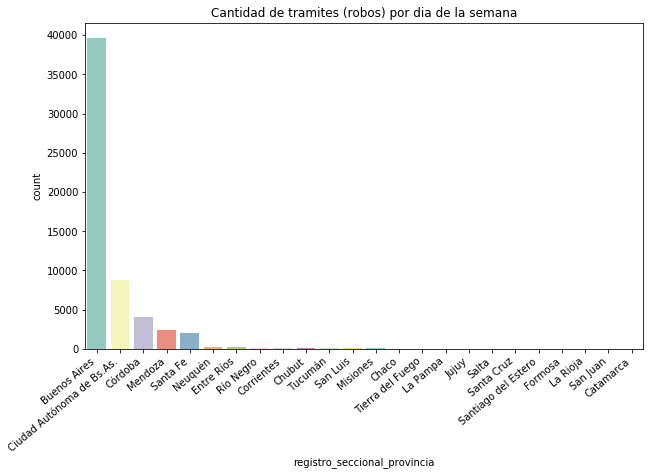

In [34]:
# Countplot de robos por provincia
plt.figure(figsize=(10,6))
ax = sns.countplot(x = "registro_seccional_provincia", 
                   data = robados, 
                   order = robados_n_marcas["registro_seccional_provincia"].value_counts().index,
                   palette = "Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por dia de la semana")
plt.show()

In [35]:
# Calculo los robos por provincia
robados_por_provincia = robados.groupby('registro_seccional_provincia').tramite_tipo.agg('count')

In [36]:
import geopandas as gpd
# El shapefile que tiene todas las provincias
shapefile = './GEO/provincia/provincia.shp'
# Lo leo usando Geopandas
provincias = gpd.read_file(shapefile)[['fna', 'nam', 'geometry']]
# Le cambio el nombre a "Tierra del Fuego, Antártida e Islas del Atlántico sur" por "Tierra del Fuego"
provincias.nam[16] = "Tierra del Fuego"
provincias.nam[0] = "Ciudad Autónoma de Bs.As."

In [37]:
# Junto el geopandas con los poligionos de las provincias con los robos por provincia
provincias = provincias.merge(robados_por_provincia, left_on='nam', right_index=True)

In [38]:
# El mapa me plotea la antartida y las islas asi que hago un rectangulo cortando solo el pais
shapefile = './GEO/AOI/AOI.shp'
# Read shapefile using Geopandas
AOI = gpd.read_file(shapefile)

In [39]:
# Construyo la intersección entre el rectángulo y el shapefile de las provincias
provincias_en_Argentina = gpd.overlay(provincias, AOI, how='intersection')
provincias_en_Argentina

,fna,nam,tramite_tipo,id,Class,geometry
0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Bs.As.,8742,1,Argentina,POLYGON Z ((-58.34188739699994 -34.63109671699...
1,Provincia del Neuquén,Neuquén,203,1,Argentina,POLYGON Z ((-70.39345041599995 -36.15525721499...
2,Provincia de La Pampa,La Pampa,43,1,Argentina,(POLYGON Z ((-64.46428512299997 -35.0000522329...
3,Provincia de Mendoza,Mendoza,2442,1,Argentina,POLYGON Z ((-69.12569695099995 -32.00283498499...
4,Provincia de San Luis,San Luis,80,1,Argentina,POLYGON Z ((-67.05547011299996 -31.85605263599...
5,Provincia de Córdoba,Córdoba,4078,1,Argentina,POLYGON Z ((-63.87034900199995 -29.62387303499...
6,Provincia de Santa Fe,Santa Fe,2039,1,Argentina,POLYGON Z ((-60.27271410899993 -33.26386310199...
7,Provincia de Entre Ríos,Entre Ríos,194,1,Argentina,POLYGON Z ((-58.58137670599996 -30.16010098199...
8,Provincia de San Juan,San Juan,17,1,Argentina,POLYGON Z ((-69.62981019099993 -28.39369204999...
9,Provincia de La Rioja,La Rioja,18,1,Argentina,POLYGON Z ((-68.52082545399998 -27.81988008299...


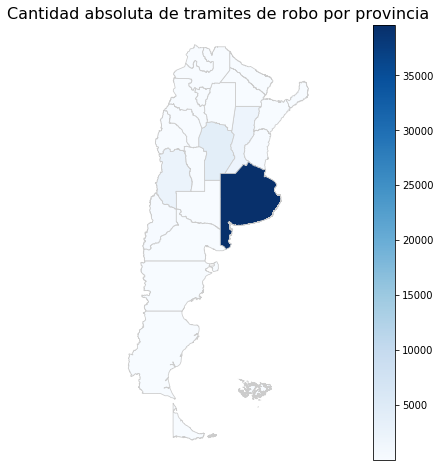

In [40]:
# Ploteo los robos absolutos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Cantidad absoluta de tramites de robo por provincia', fontdict={'fontsize': '16', 'fontweight' : '3'})
# Borro los ejes
ax.axis('off')

# Creo el colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(robados_por_provincia), vmax=max(robados_por_provincia)))
sm._A = []
cbar = fig.colorbar(sm)

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='tramite_tipo', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


Ahora voy a normalizar primero por el número de patentados en 2018 y 2019 y después por el número de habitantes de las provincias. Mi sospecha es que algunas provincias están claramente subrepresentadas (puede ser porque no cargan las denuncias al sistema, porque el sistema integral no alcanza a todas las jurisdicciones o porque no se hacen todas las denuncias). El análisis por jurisdicción lo vamos a poder ver más en detalle en el sección **Robos por departamento**.

In [41]:
patentados_por_provincia = pd.read_csv('./accesorios/Patentamiento autos.csv', sep=';', encoding='latin-1')
patentados_por_provincia = patentados_por_provincia.rename(columns={"CABA": "Ciudad Autónoma de Bs.As."})
patentados_por_provincia = patentados_por_provincia.iloc[:,2:].sum(axis = 0)
patentados_por_provincia = pd.DataFrame(data = patentados_por_provincia.values, index = patentados_por_provincia.index, columns=['Patentados'])

In [42]:
provincias_en_Argentina = provincias_en_Argentina.merge(patentados_por_provincia, left_on='nam', right_index=True)
provincias_en_Argentina["Robos_norm"] = provincias_en_Argentina["tramite_tipo"]/provincias_en_Argentina["Patentados"]
provincias_en_Argentina

,fna,nam,tramite_tipo,id,Class,geometry,Patentados,Robos_norm
0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Bs.As.,8742,1,Argentina,POLYGON Z ((-6494589.196952539 -4089578.798426...,162.032,53.952306
1,Provincia del Neuquén,Neuquén,203,1,Argentina,POLYGON Z ((-7836163.055490666 -4296795.442171...,879.655,0.230772
2,Provincia de La Pampa,La Pampa,43,1,Argentina,(POLYGON Z ((-7176131.394244757 -4139379.82854...,9403.461,0.004573
3,Provincia de Mendoza,Mendoza,2442,1,Argentina,POLYGON Z ((-7695037.385315457 -3741040.460175...,41.523,58.810780
4,Provincia de San Luis,San Luis,80,1,Argentina,POLYGON Z ((-7464580.787882729 -3721880.795366...,8183.521,0.009776
5,Provincia de Córdoba,Córdoba,4078,1,Argentina,POLYGON Z ((-7110014.727691304 -3434176.120188...,3751.839,1.086934
6,Provincia de Santa Fe,Santa Fe,2039,1,Argentina,POLYGON Z ((-6709527.843342428 -3906944.753171...,87.236,23.373378
7,Provincia de Entre Ríos,Entre Ríos,194,1,Argentina,POLYGON Z ((-6521249.024880853 -3502681.803222...,6039.878,0.032120
8,Provincia de San Juan,San Juan,17,1,Argentina,POLYGON Z ((-7751155.014494403 -3278386.469284...,9976.367,0.001704
9,Provincia de La Rioja,La Rioja,18,1,Argentina,POLYGON Z ((-7627703.398274056 -3206347.288756...,7717.000,0.002333


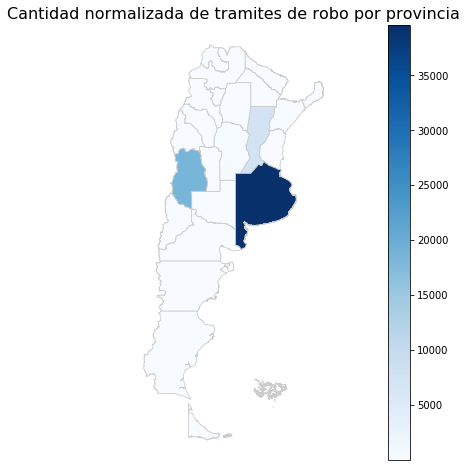

In [43]:
# Ploteo los robos absolutos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Cantidad normalizada de tramites de robo por provincia', fontdict={'fontsize': '16', 'fontweight' : '3'})
# Borro los ejes
ax.axis('off')

# Creo el colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(robados_por_provincia), vmax=max(robados_por_provincia)))
sm._A = []
cbar = fig.colorbar(sm)

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='Robos_norm', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

### recuperados

In [44]:
recuperados = pd.read_csv(r'C:\Users\Luciano\Trabajo final UTN\robo_autos\curados\recus_limpio.csv')

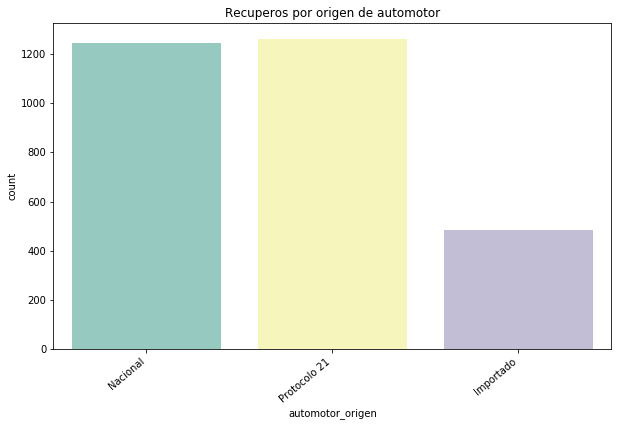

In [45]:
#Vemos la cantidad de autos recuperados en función del origen del mismo
plt.figure(figsize=(10,6))
ax = sns.countplot(x="automotor_origen", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por origen de automotor")
plt.show()

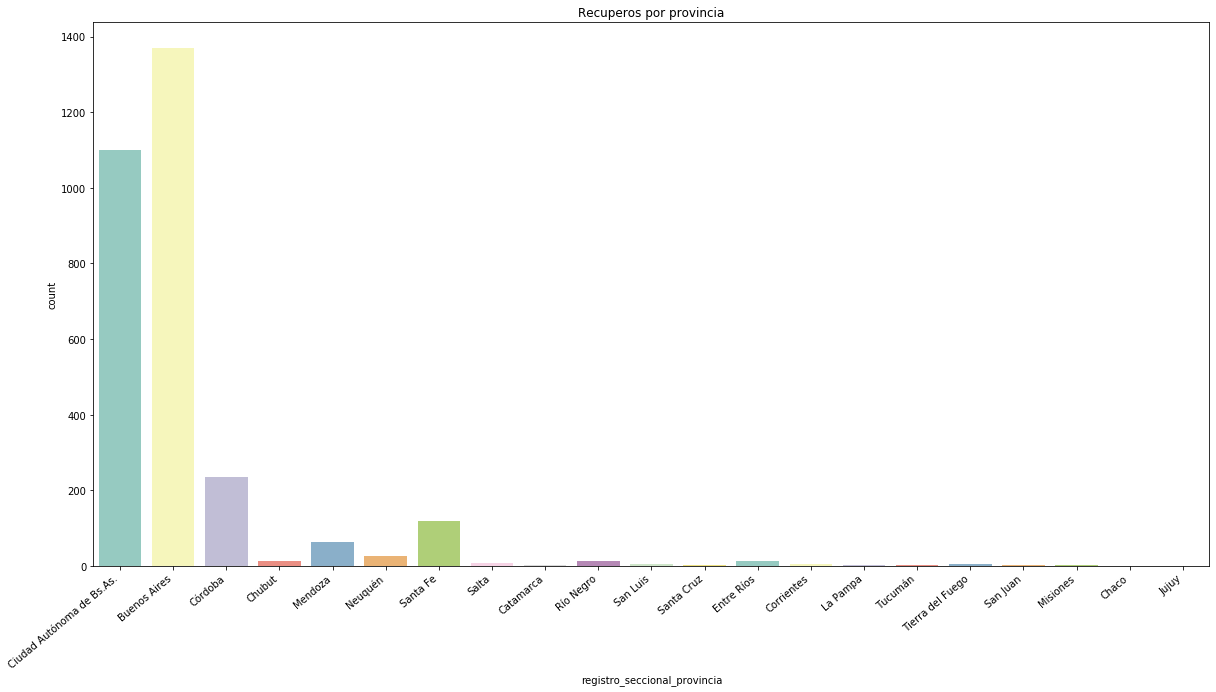

In [46]:
#Vemos recuperados por provincia
plt.figure(figsize=(20,10))
ax = sns.countplot(x="registro_seccional_provincia", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por provincia")
plt.show()

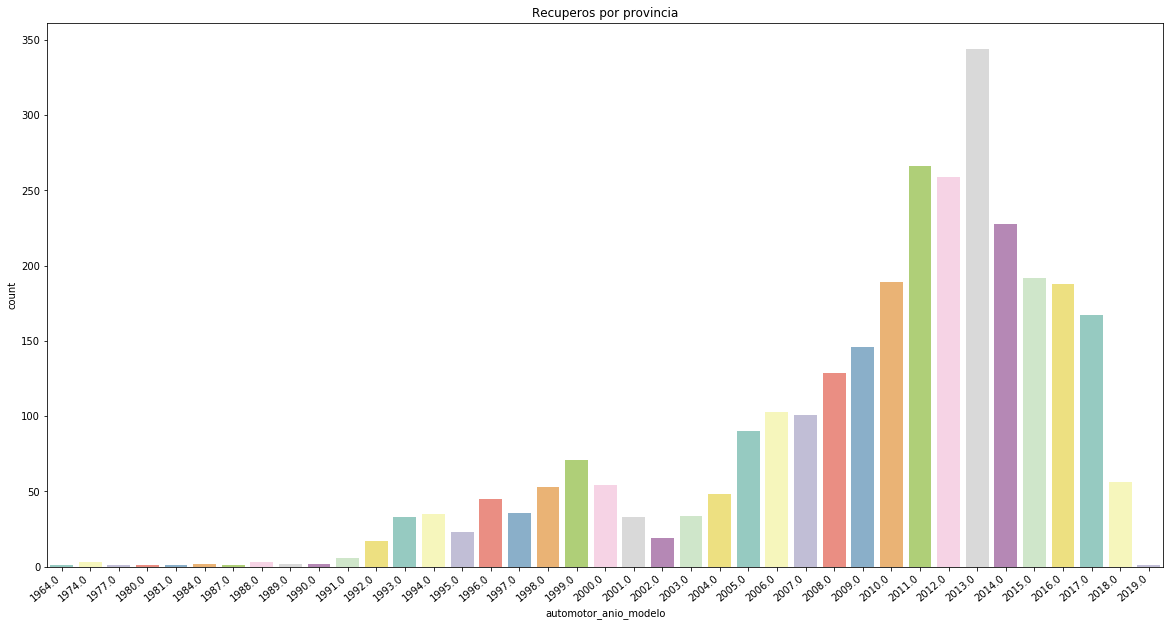

In [47]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="automotor_anio_modelo", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por provincia")
plt.show()

In [48]:
#Vamos a comparar los recuperados por anio de modelo en relación a lso robados totales de ese anio de modelo
robados_anio_count = robados['automotor_anio_modelo'].value_counts()
recuperados_anio_count = recuperados['automotor_anio_modelo'].value_counts()

In [49]:
robados_anio_count = pd.DataFrame(robados_anio_count)
recuperados_anio_count = pd.DataFrame(recuperados_anio_count)

In [50]:
robados_anio_count.columns = ['total_robados_anio_modelo']
robados_anio_count.columns

Index(['total_robados_anio_modelo'], dtype='object')

In [51]:
recuperados_anio_count.columns = ['total_recuperados_anio_modelo']
recuperados_anio_count.columns

Index(['total_recuperados_anio_modelo'], dtype='object')

In [52]:
robos_recuperos_anio_modelo = pd.merge(robados_anio_count, recuperados_anio_count, left_index=True, right_index=True, how='outer')

In [53]:
robos_recuperos_anio_modelo.fillna(0, inplace=True)

In [54]:
robos_recuperos_anio_modelo['anio_modelo'] = robos_recuperos_anio_modelo.index
#tiramos el index viejo, metemos uno nuevo y el viejo lo igualamos a una columna que inventamos
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.reset_index(drop=True)

In [55]:
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.iloc[1:]

In [56]:
robos_recuperos_anio_modelo['recuperados_relativo_robo'] = robos_recuperos_anio_modelo['total_recuperados_anio_modelo'] / robos_recuperos_anio_modelo['total_robados_anio_modelo']

In [57]:
robos_recuperos_anio_modelo.columns

Index(['total_robados_anio_modelo', 'total_recuperados_anio_modelo',
       'anio_modelo', 'recuperados_relativo_robo'],
      dtype='object')

In [58]:
anio_modelo_list = list(robos_recuperos_anio_modelo['anio_modelo'])
recuperados_relativo_robo_list = list(robos_recuperos_anio_modelo['recuperados_relativo_robo'])
tasa_sobre_robo = list(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo'])
tasa_por_robo = list(1/(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo']))

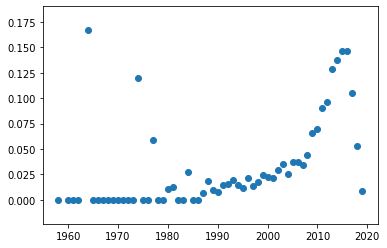

In [59]:
#Vemos la tasa de recupero por año de modelo del auto
plt.scatter(anio_modelo_list,recuperados_relativo_robo_list)
plt.show()

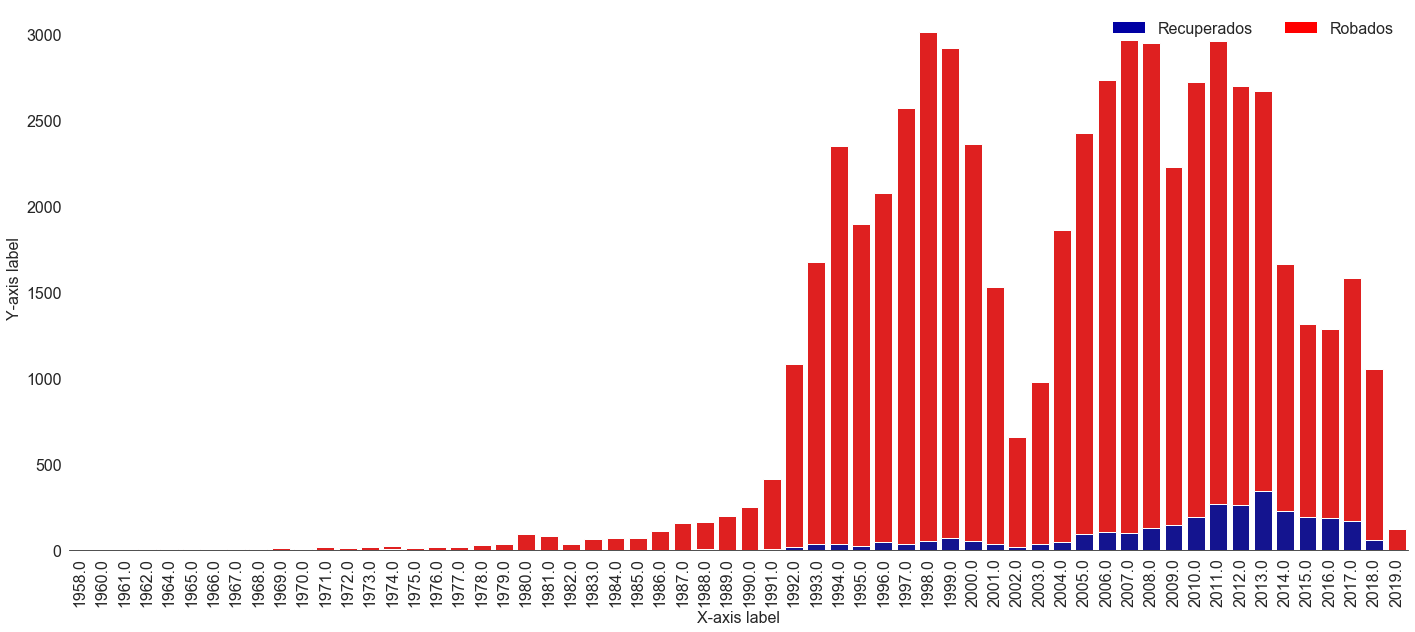

In [60]:
#Vemos cuanto se recupero en relación al robo de cada año de modelo de auto.

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_robados_anio_modelo, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_recuperados_anio_modelo, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recuperados', 'Robados'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
plt.xticks(rotation=90)
sns.despine(left=True) 
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [61]:
autos_circulantes_18 = pd.read_clipboard()

In [62]:
autos_circulantes_18.rename(columns={'Provincia / Mes':'provincia'}, inplace=True)

In [63]:
autos_circulantes_18.head(2)

,robados_por_provincia_mes


In [64]:
autos_circulantes_19 = pd.read_clipboard()

In [65]:
autos_circulantes_19.rename(columns={'Provincia / Mes':'provincia'}, inplace=True)

In [66]:
autos_circulantes_18 = autos_circulantes_18.T
autos_circulantes_18.rename(columns={'Ene':'Ene 2018', 'Feb':'Feb 2018', 'Mar':'Mar 2018', 'Abr':'Abr 2018', 'May':'May 2018','Jun':'Jun 2018', 'Jul':'Jul 2018', 'Ago':'Ago 2018', 'Sep':'Sep 2018', 'Oct':'Oct 2018', 'Nov':'Nov 2018', 'Dic':'Dic 2018'}, inplace=True)

In [67]:
autos_circulantes_19 = autos_circulantes_19.T
autos_circulantes_19.rename(columns={'Ene':'Ene 2019', 'Feb':'Feb 2019', 'Mar':'Mar 2019', 'Abr':'Abr 2019', 'May':'May 2019','Jun':'Jun 2019', 'Jul':'Jul 2019', 'Ago':'Ago 2019', 'Sep':'Sep 2019', 'Oct':'Oct 2019', 'Nov':'Nov 2019', 'Dic':'Dic 2019'}, inplace=True)

In [68]:
autos_circulantes_1819 = autos_circulantes_18.merge(autos_circulantes_19, on='provincia')

KeyError: 'provincia'

In [ ]:
autos_circulantes_1819.to_csv('autos_circulantes_1819.csv')

In [137]:
autos_circulantes_1819 = pd.read_csv(r'C:\Users\Luciano\Trabajo final UTN\robo_autos\autos_circulantes_1819.csv')

In [138]:
autos_circulantes_1819

,Unnamed: 0,provincia,Ene 2018,Feb 2018,Mar 2018,Abr 2018,May 2018,Jun 2018,Jul 2018,Ago 2018,Sep 2018,Oct 2018,Nov 2018,Dic 2018,Ene 2019,Feb 2019,Mar 2019,Abr 2019,May 2019,Jun 2019,Jul 2019,Ago 2019,Sep 2019,Oct 2019,Nov 2019,Dic 2019
0,0,BUENOS AIRES,5.804.239,5.839.697,5.868.256,5.893.402,5.920.686,5.941.406,5.962.963,5.983.710,6.001.172,6.016.745,6.029.036,6.038.714,6.059.026,6.073.807,6.085.199,6.095.620,6.107.071,6.118.602,6.135.091,6.148.642,6.160.041,6.171.036,0,0
1,1,CABA,1.512.568,1.515.272,1.519.960,1.524.526,1.529.132,1.530.145,1.532.421,1.535.016,1.536.298,1.538.203,1.539.573,1.539.809,1.542.986,1.529.004,1.534.804,1.543.731,1.543.117,1.543.388,1.545.364,1.545.277,1.545.332,1.544.318,0,0
2,2,CATAMARCA,100.851,101.486,102.193,102.945,103.643,104.250,118.378,118.787,119.035,119.324,119.498,119.538,119.837,119.460,119.822,120.254,120.378,120.488,120.645,120.837,120.968,121.080,0,0
3,3,CORDOBA,1.532.993,1.539.285,1.547.176,1.554.582,1.562.590,1.568.895,1.575.540,1.581.607,1.586.302,1.590.535,1.593.920,1.596.398,1.602.271,1.604.480,1.608.560,1.612.625,1.615.645,1.618.829,1.623.177,1.627.192,1.629.999,1.632.500,0,0
4,4,CORRIENTES,282.891,284.637,286.627,288.454,290.436,291.875,293.408,295.005,296.128,297.220,298.197,298.854,300.188,301.109,301.983,302.877,303.540,304.292,305.332,306.137,306.822,307.291,0,0
5,5,CHACO,245.580,247.158,249.221,251.160,253.074,254.521,256.009,257.392,258.426,259.176,259.755,260.091,261.269,261.621,262.407,263.233,263.825,264.395,265.210,265.879,266.324,266.804,0,0
6,6,CHUBUT,305.939,307.492,309.308,310.764,312.220,313.379,314.460,315.641,316.575,317.462,318.175,318.677,319.808,319.890,320.905,321.952,322.826,323.417,324.477,325.293,325.963,326.559,0,0
7,7,ENTRE RIOS,521.379,523.556,526.099,528.250,530.611,532.409,534.377,536.099,537.495,538.851,539.883,540.620,542.370,544.000,545.028,545.854,546.939,547.960,549.487,550.806,551.950,553.109,0,0
8,8,FORMOSA,100.446,101.121,101.982,102.758,103.468,104.043,104.714,105.382,105.858,106.238,106.603,106.852,107.435,107.702,108.144,108.565,108.826,109.006,109.516,109.902,110.165,110.377,0,0
9,9,JUJUY,175.571,176.651,177.791,178.885,180.263,181.239,182.101,182.961,183.645,184.325,184.864,185.298,186.161,186.771,187.301,187.900,188.400,188.869,189.563,190.170,190.653,191.060,0,0


In [110]:
robados_por_provincia_mes=  robados[['tramite_tipo', 'tramite_fecha' ,'registro_seccional_provincia']]

In [111]:
robados_por_provincia_mes['fecha'] = robados["mes_anio"]

In [112]:
robados_por_provincia_mes = robados_por_provincia_mes.drop('tramite_fecha', 1)

In [113]:
robados_por_provincia_mes.head(4)

,tramite_tipo,registro_seccional_provincia,fecha
0,DENUNCIA DE ROBO O HURTO,Buenos Aires,Enero 2018
1,DENUNCIA DE ROBO O HURTO,Buenos Aires,Enero 2018
2,DENUNCIA DE ROBO O HURTO,Buenos Aires,Enero 2018
4,DENUNCIA DE ROBO O HURTO,Buenos Aires,Enero 2018


In [114]:
robados_por_provincia_mes_pivot = pd.pivot_table(robados_por_provincia_mes, values='tramite_tipo', index=['registro_seccional_provincia','fecha'], aggfunc='count')

In [97]:
robados_por_provincia_mes_pivot.rename(columns={'tramite_tipo':'robos'})

Index(['tramite_tipo'], dtype='object')

In [121]:
robados_por_provincia_mes_pivot_df = pd.DataFrame(robados_por_provincia_mes_pivot)

In [132]:
 robados_por_provincia_mes_pivot_df = robados_por_provincia_mes_pivot_df.reset_index()

In [135]:
robados_por_provincia_mes_pivot_df.rename(columns={'tramite_tipo':'robos'})

,registro_seccional_provincia,fecha,robos
0,Buenos Aires,Abril 2018,1842
1,Buenos Aires,Abril 2019,1916
2,Buenos Aires,Agosto 2018,2156
3,Buenos Aires,Agosto 2019,2027
4,Buenos Aires,Diciembre 2018,1582
5,Buenos Aires,Enero 2018,1977
6,Buenos Aires,Enero 2019,2030
7,Buenos Aires,Febrero 2018,1621
8,Buenos Aires,Febrero 2019,1839
9,Buenos Aires,Julio 2018,2085


In [ ]:
#Vemos cuanto se recupero en relación al robo de cada año de modelo de auto.

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x =  y = robos_recuperos_anio_modelo.total_robados_anio_modelo, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_recuperados_anio_modelo, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recuperados', 'Robados'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
plt.xticks(rotation=90)
sns.despine(left=True) 
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)